## 1. Exploratory Data Analysis

In this section, we explore the Bank Marketing Data Set from the UCI Machine Learning Repository.  
The aim is to gain a clear understanding of the dataset’s structure, customer demographics, campaign features, and the key factors influencing term deposit subscription outcomes.

We begin by examining the overall data structure, checking for missing values, and analyzing the distributions of both numerical and categorical variables.  
Subsequent steps include comparing customer characteristics by subscription status, visualizing feature-target relationships, and identifying trends or patterns that may inform later modeling and business strategy.

This initial analysis provides valuable insights that serve as the foundation for all subsequent predictive modeling and decision-making.


**📚 Data Source**

The dataset used in this project is the **Bank Marketing Data Set** from the UCI Machine Learning Repository.  
It contains information about marketing campaigns of a Portuguese bank, including customer demographics, financial attributes, and campaign outcomes.

- [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)
- Original data files: `bank-full.csv`, `bank.csv`, and attribute names in `bank-names.txt`
- Reference:  
  Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. *Decision Support Systems*, 62, 22–31.

The data is publicly available and commonly used for research and educational purposes.


### 1. Library Import and Data Loading

In this section, we import all the essential Python libraries for data analysis, visualization, and modeling, including `pandas`, `numpy`, `matplotlib`, `seaborn`, and several modules from `scikit-learn` and `imblearn`.  
We also configure notebook display settings for cleaner outputs and consistent plot styling.

Next, we load the **Bank Marketing Data Set** (`bank-full.csv`) and display a random sample of rows to preview the dataset structure and content.  
This prepares the environment for subsequent exploratory analysis and modeling tasks.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, accuracy_score
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_theme(style="whitegrid")


In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')  
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
27661,32,admin.,married,secondary,no,4764,no,no,telephone,21,nov,69,2,-1,0,unknown,no
33133,32,services,married,secondary,no,197,yes,no,cellular,20,apr,421,4,-1,0,unknown,no
41474,25,management,single,tertiary,no,89,no,no,cellular,7,sep,274,1,-1,0,unknown,no
19529,34,technician,married,tertiary,no,4953,no,no,cellular,7,aug,235,2,-1,0,unknown,no
28849,36,unemployed,single,secondary,no,605,no,no,cellular,30,jan,410,2,-1,0,unknown,no
30975,31,management,single,tertiary,no,153,no,no,cellular,9,feb,65,3,-1,0,unknown,no
2541,31,admin.,single,secondary,no,150,yes,yes,unknown,13,may,431,2,-1,0,unknown,no
2852,37,blue-collar,married,secondary,no,15801,yes,no,unknown,14,may,456,9,-1,0,unknown,no
7892,40,blue-collar,married,primary,no,3693,yes,no,unknown,30,may,57,10,-1,0,unknown,no
27805,27,technician,single,tertiary,no,28,no,no,cellular,28,jan,174,1,-1,0,unknown,no


### 2. Initial Data Exploration

This section provides a quick overview of the dataset’s structure and main variables:

- **Dataset structure**: Checked the number of rows and columns, data types, and missing values for all features.
- **Target variable analysis**: Examined the distribution of the target variable (`y`), representing whether a customer subscribed to a term deposit, and visualized the class balance.
- **Numerical features summary**: Reviewed descriptive statistics for all numerical variables, such as `age`, `balance`, and `duration`.
- **Categorical feature exploration**: Investigated the distribution of key categorical variables, using `job` as an example, to understand the breakdown of customer occupations in the data.

These steps help build a foundational understanding of the dataset before moving on to more detailed analysis.


 **Key Findings from Initial Visualizations:**

- **Term Deposit Subscription Rate:**  
  The vast majority of customers in the dataset did **not** subscribe to a term deposit, with only a small proportion (~12%) choosing to do so. This highlights a strong class imbalance in the target variable, which should be considered in subsequent modeling.

- **Job Distribution:**  
  The most common occupations among customers are **blue-collar**, **management**, and **technician**, together making up a significant portion of the dataset. In contrast, categories such as **student** and **unknown** are much less represented.  
  Understanding job distribution is important as occupation may influence a customer's likelihood to subscribe to term deposits.

These observations provide early insight into the data’s composition and indicate potential factors to focus on during further analysis.


Dataset shape: (45211, 17)

Column data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Target variable 'y' distribution:
y
no     39922
yes     5289
Name: count, dtype: int64


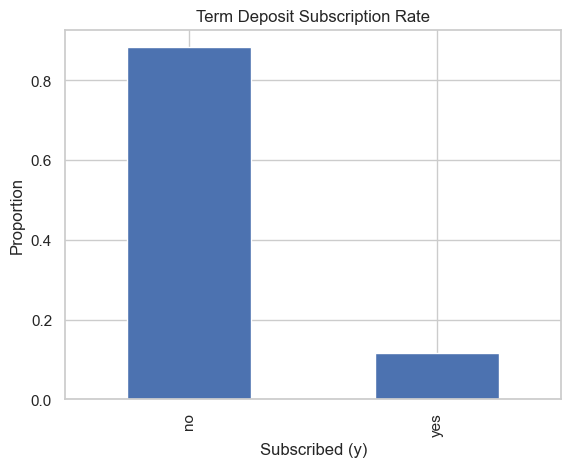


Numerical features summary:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000 

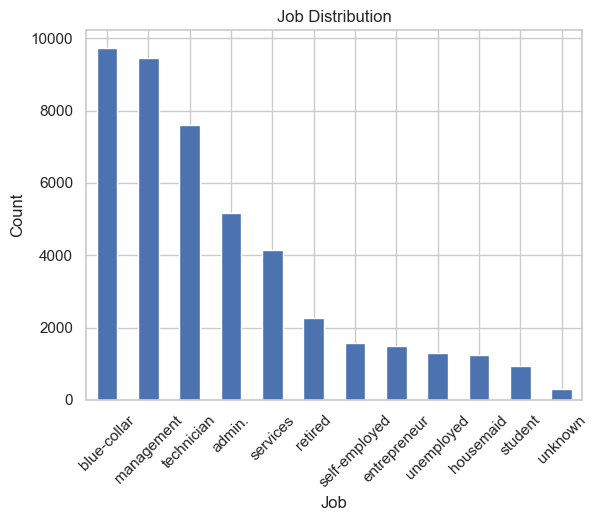

In [12]:
# 1. Basic dataset info
print("Dataset shape:", df.shape)
print("\nColumn data types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum())

# 2. Target variable distribution
print("\nTarget variable 'y' distribution:")
print(df['y'].value_counts())
df['y'].value_counts(normalize=True).plot(kind='bar')
plt.title("Term Deposit Subscription Rate")
plt.xlabel("Subscribed (y)")
plt.ylabel("Proportion")
plt.show()

# 3. Numerical features descriptive statistics
print("\nNumerical features summary:")
print(df.describe())

# 4. Categorical feature distribution (example: 'job')
print("\nJob distribution:")
print(df['job'].value_counts())
df['job'].value_counts().plot(kind='bar')
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Comparison of Numerical Features by Subscription Status

We use a simple bar plot to understand how key numerical features differ between customers who subscribed to a term deposit and those who did not. We compared the group means of variables such as age, balance, duration, campaign, pdays, and previous contacts.

**Key findings:**
- **Balance:** Customers who subscribed (`yes`) had a higher average balance than those who did not (`no`), suggesting that wealthier clients may be more likely to invest in term deposits.
- **Duration:** The average duration of the last contact was much higher for subscribers, indicating that longer conversations with the bank are strongly associated with successful subscriptions.
- **Age:** The mean age is slightly higher for subscribers.
- **Previous contacts & campaign:** Subscribers also had more previous contacts and participated in more campaigns on average.
- **pdays:** Subscribers tended to have higher values, meaning more days passed since they were last contacted.

<u>*For the distribution of Age, Previous Contacts, and Compaign, please check the second bar plot.*</u>


These differences suggest that factors such as account balance, call duration, and the frequency/timing of contacts are important in predicting customer subscription behavior.


Mean values of numerical features by subscription status:
y                  no          yes
age         40.838986    41.670070
balance   1303.714969  1804.267915
duration   221.182806   537.294574
campaign     2.846350     2.141047
pdays       36.421372    68.702968
previous     0.502154     1.170354


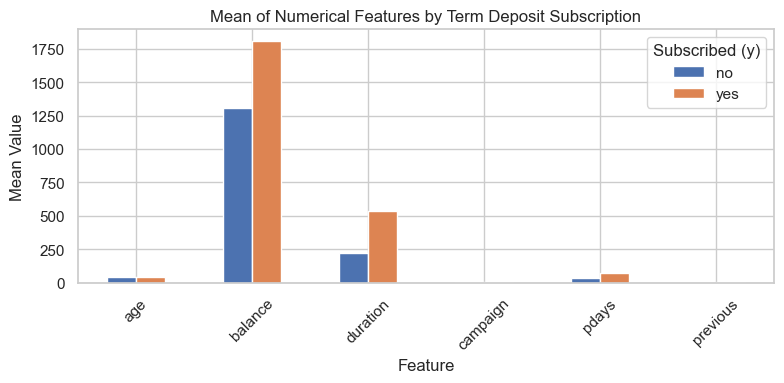

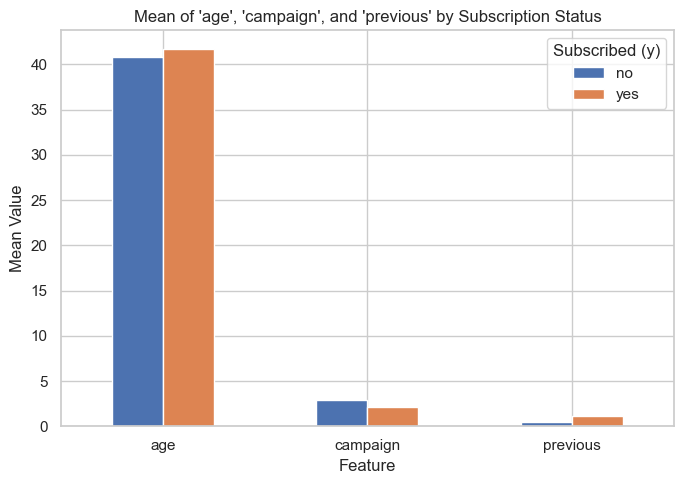

In [29]:
# Compare mean of numerical features between y='yes' and y='no'
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
grouped_means = df.groupby('y')[numerical_cols].mean().T
print("Mean values of numerical features by subscription status:")
print(grouped_means)

grouped_means.plot(kind='bar', figsize=(8,4))
plt.title("Mean of Numerical Features by Term Deposit Subscription")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

### only select age, campaign, and previous
selected = grouped_means.loc[['age', 'campaign', 'previous']]

### bar plot
selected.plot(kind='bar', figsize=(7, 5))
plt.title("Mean of 'age', 'campaign', and 'previous' by Subscription Status")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.xticks(rotation=0)
plt.legend(title="Subscribed (y)")
plt.tight_layout()
plt.show()


### Subscription Rate by Job

To explore how occupation influences the likelihood of term deposit subscription, we calculated and visualized the subscription rate (`y = yes`) for each job category.

**Key findings:**
- There is substantial variation in subscription rates across different job types.
- **Students** and **retired** customers show the highest subscription rates, with students exceeding 20% and retired customers above 22%.
- Other occupations with above-average rates include **unemployed** and **management**.
- In contrast, **blue-collar**, **entrepreneur**, and **housemaid** have notably lower subscription rates, often below 10%.
- These differences indicate that job type is an important predictor of whether a customer is likely to subscribe to a term deposit.

This analysis suggests that targeted marketing strategies by occupation could be effective in increasing subscription rates.


Subscription rate by job:
y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


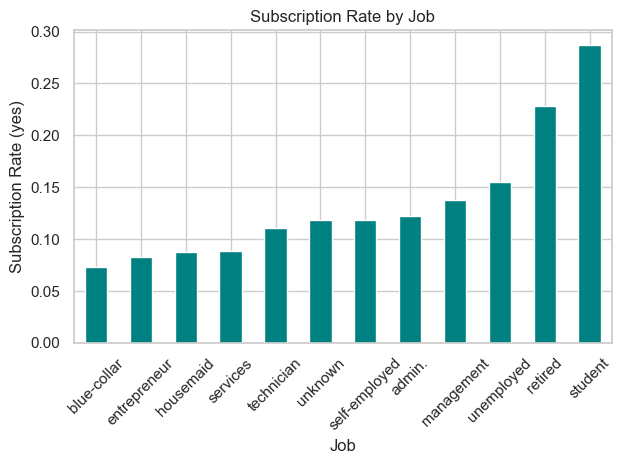

In [14]:
# Subscription rate by job
job_rate = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
print("Subscription rate by job:")
print(job_rate)

job_rate['yes'].sort_values().plot(kind='bar', color='teal')
plt.title("Subscription Rate by Job")
plt.ylabel("Subscription Rate (yes)")
plt.xlabel("Job")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis of Numerical Features

To better understand the relationships among key numerical features in our dataset, we calculated and visualized their pairwise correlations using both a correlation matrix and a heatmap.

**Key findings:**
- Most numerical features show **low correlation** with each other, suggesting limited multicollinearity in the data.
- The strongest positive correlation appears between **pdays** (days since previous contact) and **previous** (number of previous contacts), with a coefficient of ~0.45. This makes sense as both variables relate to customer contact history.
- Other variable pairs have correlation coefficients close to zero, indicating that age, balance, duration, campaign, etc., capture largely independent information about customers.

This analysis confirms that most numerical features can be used together in modeling without major redundancy or risk of collinearity.


Correlation matrix (numerical features):
               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


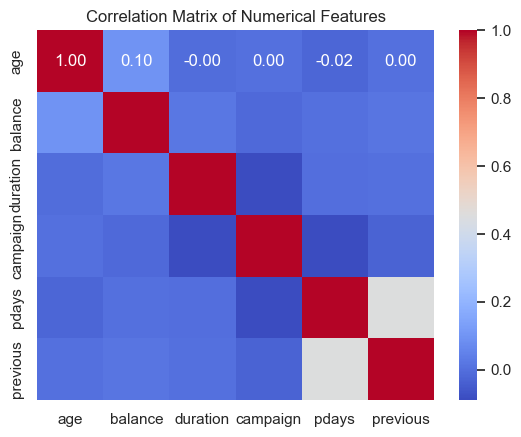

In [15]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()
print("Correlation matrix (numerical features):")
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Balance Distribution by Subscription Status

A boxplot was used to compare the distribution of account balances between customers who subscribed to a term deposit (`yes`) and those who did not (`no`).

**How to Interpret the Boxplot**

This boxplot visualizes the distribution of account balances for customers who subscribed (`yes`) and did not subscribe (`no`) to a term deposit.

- **The central line** inside each box shows the **median** account balance for each group.
- **The top and bottom edges of each box** represent the **first quartile (Q1)** and **third quartile (Q3)**, indicating where the middle 50% of the data falls.
- **The whiskers** extend to show the range of values within 1.5 times the interquartile range (IQR) from the quartiles.
- **Dots** that appear beyond the whiskers are **outliers**—customers with exceptionally high or low account balances compared to others in the group.

By examining this plot, we can compare both the typical balance and the spread (variability) for each group:
- Subscribers (`yes`) have a higher median balance.
- Both groups have a large number of outliers, with the subscriber group displaying some very high balances.
- The distribution for subscribers is more spread out, as shown by the larger box and longer whiskers.

This plot helps us understand how balance differs between subscribers and non-subscribers, and highlights the importance of considering outliers and spread in further analysis.


**Key findings:**
- The median balance is higher among customers who subscribed, indicating that customers with greater account balances are more likely to open a term deposit.
- Both groups display a large number of outliers, with some customers holding exceptionally high balances.
- The distributions are right-skewed for both groups, but the overall spread is greater for subscribers.

This visualization reinforces the importance of account balance as a potential predictor in modeling subscription behavior, while also highlighting the need to handle outliers in further analysis.


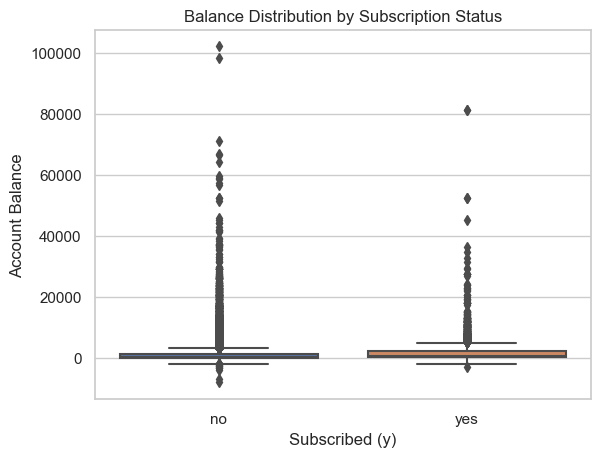

In [16]:
sns.boxplot(x='y', y='balance', data=df)
plt.title("Balance Distribution by Subscription Status")
plt.xlabel("Subscribed (y)")
plt.ylabel("Account Balance")
plt.show()

### Age Distribution by Subscription Status

A violin plot was used to visualize the age distribution of customers by their term deposit subscription status (`yes` or `no`).

**How to Interpret the Violin Plot**

This violin plot shows the age distributions for customers who subscribed (`yes`) and did not subscribe (`no`) to a term deposit.

- **The width of each "violin"** at a given age value represents the **density** of customers at that age—wider sections indicate more customers in that age range.
- **The white dot in the center** shows the **median age** for each group.
- **The thick black bar** in the center of each violin represents the **interquartile range (IQR)**, where the middle 50% of the ages are found.
- **The thin black line** extends to the minimum and maximum ages, excluding outliers.

By examining the violin plot:
- You can see where ages are most concentrated and how the spread differs between groups.
- For example, both groups cluster in the 30–50 age range, but subscribers have a broader spread at higher ages.
- The median and IQR give a quick sense of typical ages and variability in each group.

Violin plots are useful for comparing distributions and spotting differences in shape, spread, and central tendency between groups.


**Key findings:**
- The overall age distribution is similar between subscribers and non-subscribers, both spanning a wide age range from early 20s to above 90.
- The median age is slightly higher among subscribers, indicating that older customers may be marginally more likely to subscribe to term deposits.
- Both groups show a concentration of customers in the 30–50 age range, but subscribers have a somewhat broader spread at higher ages.
- The plot suggests age has a weak but noticeable relationship with subscription likelihood, and could serve as a useful feature in further predictive modeling.

This analysis helps identify age-related trends and informs future segmentation or targeting strategies.


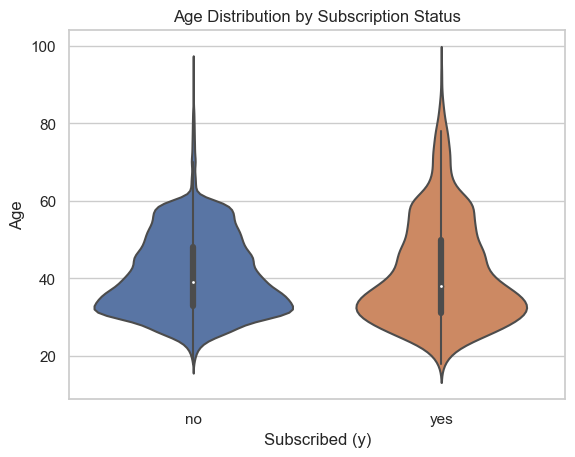

In [17]:
sns.violinplot(x='y', y='age', data=df)
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Subscribed (y)")
plt.ylabel("Age")
plt.show()


### Subscription Rate by Month

The bar chart above shows the subscription rate for term deposits by month.

**Key findings:**
- There is significant seasonality in subscription rates throughout the year.
- The highest subscription rates are observed in March (over 50%), followed by September, October, and December, where rates are also relatively high (around 40-45%).
- Other months, especially May, June, July, and August, have notably lower subscription rates, generally below 15%.
- These trends may be linked to the timing of marketing campaigns, seasonal customer preferences, or broader economic cycles.

Understanding these monthly patterns can help optimize campaign timing and resource allocation for future marketing efforts.


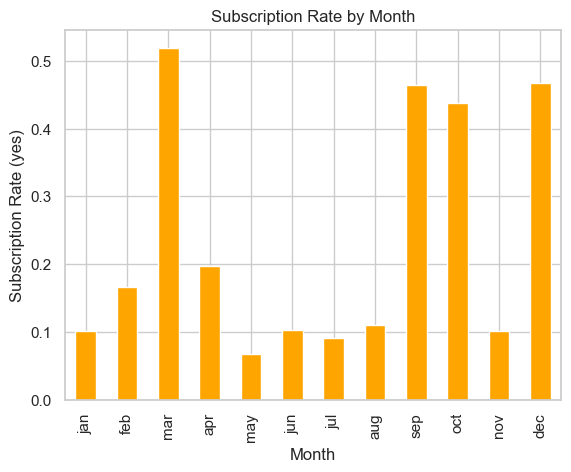

In [18]:
# Subscription rate by month
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_rate = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0).loc[month_order]
month_rate['yes'].plot(kind='bar', color='orange')
plt.title("Subscription Rate by Month")
plt.ylabel("Subscription Rate (yes)")
plt.xlabel("Month")
plt.show()


### Missing Values Check

To ensure data quality, we checked for missing values in each column of the dataset.  
The result shows that there are **no missing values** in `bank-full.csv`.  
This means all columns are fully populated, and no imputation or data cleaning for missingness is necessary.


In [19]:
# Check for missing values (in bank-full.csv usually there are none, but just in case)
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


Missing values per column:
Series([], dtype: int64)


### Logistic Regression Modeling

We fit a logistic regression model to estimate the probability that a customer subscribes to a term deposit, using features such as age, account balance, duration, and whether the customer has a housing or personal loan.

**Model Summary:**
- The model coefficients indicate how each feature affects the likelihood of subscription:
    - **Housing loan** (`housing[T.yes]`) and **personal loan** (`loan[T.yes]`): Both are significantly negative, meaning customers with these loans are less likely to subscribe.
    - **Balance** and **duration**: Both have positive and significant effects, indicating that customers with higher balances and longer contact durations are more likely to subscribe.
    - **Age**: Not statistically significant in this model.
- The regression output includes estimated coefficients, standard errors, z-values, and p-values to assess statistical significance.

**Example Prediction:**
- The predicted probabilities for the first 5 samples are also shown, demonstrating the model's output.

This regression provides interpretable insights into which factors are most associated with successful term deposit subscriptions in the bank's marketing campaign.


In [ ]:
import statsmodels.formula.api as smf

# Convert target to binary (if not already)
df['y_binary'] = (df['y'] == 'yes').astype(int)

# Select features for the logistic regression model; We select age balance duration housing and loan.
features = ['age', 'balance', 'duration', 'housing', 'loan']  

formula = 'y_binary ~ ' + ' + '.join(features)

# Logit Regression
logit_model = smf.logit(formula, data=df).fit()

# print out coefficients and different stats.
print(logit_model.summary())

# Predict the probability
pred_probs = logit_model.predict(df[features].head())
print("Predicted subscription probabilities for first 5 samples:")
print(pred_probs)


Optimization terminated successfully.
         Current function value: 0.289124
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               y_binary   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45205
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                  0.1988
Time:                        20:26:51   Log-Likelihood:                -13072.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6114      0.069    -37.722      0.000      -2.747      -2.476
housing[T.yes]   

### Credit Scorecard Prediction

In this section, we implemented a simple rule-based credit scorecard to predict whether a customer will subscribe to a term deposit.

- **Scorecard Design:**  
  The scorecard assigns points based on several attributes:
  - **Age:** Younger customers receive lower scores, while middle-aged and older customers receive higher scores.
  - **Balance:** Customers with higher account balances get higher scores, and negative balances are penalized.
  - **Housing Loan:** Customers without a housing loan receive extra points.
  - **Personal Loan:** Customers without a personal loan also receive extra points.

- **Thresholding:**  
  Customers with a total score above a chosen threshold (e.g., 20) are predicted as "subscribed" (1), otherwise "not subscribed" (0).

- **Results:**  
  - The predictions were compared to the actual subscription status.
  - The scorecard model achieves high precision for the negative class but low recall and overall low accuracy (0.31).
  - This suggests that while simple rule-based models can capture some broad patterns, they tend to underperform compared to statistical or machine learning models, especially for imbalanced data.

**Takeaway:**  
The scorecard approach is transparent and easy to interpret, but it is limited in predictive power. More advanced models may be required for better performance in real-world applications.


In [31]:
def credit_scorecard(row):
    # Age scoring
    if row['age'] < 30:
        score = 0
    elif row['age'] <= 50:
        score = 10
    else:
        score = 5

    # Balance scoring
    if row['balance'] < 0:
        score += -10
    elif row['balance'] <= 1000:
        score += 5
    else:
        score += 15

    # Housing loan scoring
    score += 10 if row['housing'] == 'no' else 0

    # Personal loan scoring
    score += 5 if row['loan'] == 'no' else 0

    return score

# Use the rule above, obtain the score of each individual.
df['scorecard'] = df.apply(credit_scorecard, axis=1)

# Set the threshold for classifier（score>=20 --> will subscribe）
threshold = 20
df['scorecard_pred'] = (df['scorecard'] >= threshold).astype(int)


print(df[['age', 'balance', 'housing', 'loan', 'scorecard', 'scorecard_pred']].head())

# comparing the prediction with the real results.
from sklearn.metrics import classification_report
print(classification_report(df['y_binary'], df['scorecard_pred']))


   age  balance housing loan  scorecard  scorecard_pred
0   58     2143     yes   no         25               1
1   44       29     yes   no         20               1
2   33        2     yes  yes         15               0
3   47     1506     yes   no         30               1
4   33        1      no   no         30               1
              precision    recall  f1-score   support

           0       0.93      0.23      0.37     39922
           1       0.13      0.88      0.23      5289

    accuracy                           0.31     45211
   macro avg       0.53      0.55      0.30     45211
weighted avg       0.84      0.31      0.35     45211



### Grouped Probability Prediction by Job and Housing

In this section, we estimate the probability of term deposit subscription for different groups defined by `job` and `housing` status, using historical data.

**What was done:**
- Calculated the historical subscription probability for each `(job, housing)` group by computing the mean of the binary target (`y_binary`) within each group.
- Looked up the predicted probability for a specific group (e.g., `job='management'` and `housing='no'`). In this case, the predicted subscription probability is about **18.2%**.
- Applied these group-based probabilities to the full dataset, assigning each observation the historical probability of its `(job, housing)` group as the predicted probability.

**Results:**
- The group-based probabilities show substantial variation. For example:
    - Students without a housing loan have the highest subscription probability (~23.2%).
    - Blue-collar workers with a housing loan have the lowest (~6.2%).
- This approach provides a transparent, interpretable prediction benchmark, showing how much predictive power can be achieved by simply using historical rates for groups defined by two key features.

**Takeaway:**  
While this method is simple and easy to interpret, it may miss individual-level variation and cannot capture complex interactions among more features. Still, it is a practical baseline or “business rule” approach often used in credit scoring and risk analytics.


In [32]:
# Group by job and housing, historical subsription rate
prob_table = df.groupby(['job', 'housing'])['y_binary'].mean().unstack()

print("Subscription probability table by job and housing:")
print(prob_table)


# Assume a new agent's job is management, no housing loan.
# Seach for the subscription rate.
job = 'management'
housing = 'no'

pred_prob = prob_table.loc[job, housing]
print(f"Predicted subscription probability for (job={job}, housing={housing}): {pred_prob:.2%}")


df['group_pred_prob'] = df.set_index(['job', 'housing']).index.map(lambda idx: prob_table.loc[idx])
print(df[['job', 'housing', 'group_pred_prob']].head())


Subscription probability table by job and housing:
housing              no       yes
job                              
admin.         0.172951  0.090195
blue-collar    0.101714  0.061720
entrepreneur   0.113269  0.060990
housemaid      0.100950  0.060302
management     0.182008  0.092133
retired        0.261703  0.105906
self-employed  0.146192  0.088889
services       0.132565  0.066884
student        0.358491  0.088353
technician     0.144744  0.081652
unemployed     0.213158  0.073665
unknown        0.122137  0.076923
Predicted subscription probability for (job=management, housing=no): 18.20%
            job housing  group_pred_prob
0    management     yes         0.092133
1    technician     yes         0.081652
2  entrepreneur     yes         0.060990
3   blue-collar     yes         0.061720
4       unknown      no         0.122137


### 📊 Subscription Rate by Education, Job & Housing

**Education:**  
We calculated the term deposit subscription rate for each education group. Customers with higher education levels (especially tertiary) have notably higher subscription rates, while those with primary education have the lowest.

**Job & Housing:**  
We also analyzed the joint impact of job type and housing loan status. For example, within each job group, customers without a housing loan consistently show higher subscription rates than those with a loan. Administrative and entrepreneurial jobs have the highest rates, especially when there is no housing loan.

**Conclusion:**  
Both education level and the combination of job type with housing status are important predictors of whether a customer subscribes to a term deposit.


Subscription rate by education level:
y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
unknown    0.864297  0.135703


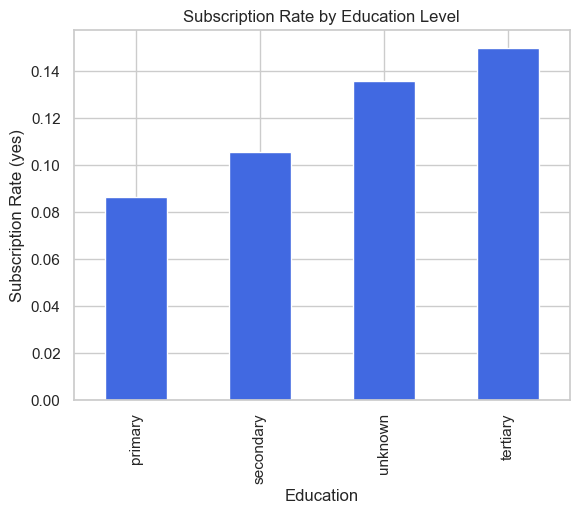

Subscription rate by job and housing:
y                           no       yes
job          housing                    
admin.       no       0.827049  0.172951
             yes      0.909805  0.090195
blue-collar  no       0.898286  0.101714
             yes      0.938280  0.061720
entrepreneur no       0.886731  0.113269


In [35]:
edu_rate = pd.crosstab(df['education'], df['y'], normalize='index')
print("Subscription rate by education level:")
print(edu_rate)

edu_rate['yes'].sort_values().plot(kind='bar', color='royalblue')
plt.title("Subscription Rate by Education Level")
plt.xlabel("Education")
plt.ylabel("Subscription Rate (yes)")
plt.show()

job_housing_rate = pd.crosstab([df['job'], df['housing']], df['y'], normalize='index')
print("Subscription rate by job and housing:")
print(job_housing_rate.head())

job_housing_rate.to_csv("job_housing_subscription_rate.csv")


### Conditional Probability Analysis for Subgroups

In this section, we estimate the probability of term deposit subscription (`y='yes'`) for specific subgroups defined by one or more conditions.

**What was done:**
- Calculated the probability of subscription for customers with a housing loan (`housing='yes'`) but no personal loan (`loan='no'`).  
    - The estimated probability is **8.04%**.
- Calculated the probability for a more specific subgroup: customers who are `admin.`, have a tertiary education, and no housing loan.  
    - The estimated probability for this group is **22.59%**.

**Takeaway:**  
By conditioning on different sets of features, we can explore how subscription probabilities vary across customer segments. This approach provides granular, interpretable insights into which combinations of customer attributes are associated with higher or lower subscription rates.  
It is a useful tool for both exploratory analysis and simple rule-based targeting in marketing or credit risk contexts.


In [33]:
# 1. P(y='yes' | housing='yes', loan='no')
subgroup = df[(df['housing'] == 'yes') & (df['loan'] == 'no')]
prob = subgroup['y_binary'].mean()
print(f"P(y='yes' | housing='yes', loan='no') = {prob:.2%}")

# 2. Multiple conditions, e.g. job/education 
subgroup2 = df[(df['job'] == 'admin.') & (df['education'] == 'tertiary') & (df['housing'] == 'no')]
prob2 = subgroup2['y_binary'].mean()
print(f"P(y='yes' | job='admin.', education='tertiary', housing='no') = {prob2:.2%}")


P(y='yes' | housing='yes', loan='no') = 8.04%
P(y='yes' | job='admin.', education='tertiary', housing='no') = 22.59%


### Naive Bayes Modeling for Term Deposit Subscription

In this step, we apply a Naive Bayes classifier to predict the probability that a customer subscribes to a term deposit, using only categorical features.

**What was done:**
- Encoded categorical variables (`job`, `marital`, `education`, `housing`, `loan`, `default`, `contact`) into numerical codes using `LabelEncoder`.
- Constructed the feature matrix and target vector (`y_binary`).
- Trained a `CategoricalNB` (Naive Bayes for categorical data) model on the entire dataset.
- Predicted the probabilities of subscription for the first five samples.

**Results:**  
The model outputs the predicted probability of each class (not subscribed / subscribed) for each sample. For example, the first row `[0.96, 0.04]` indicates a 4% predicted probability of subscription for that customer, while `[0.90, 0.10]` suggests a 10% chance for another.

**Takeaway:**  
Naive Bayes provides a simple, interpretable baseline model for categorical data, quickly giving us probability estimates that can be compared or used in further decision-making.  


In [24]:
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
for col in ['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact']:
    df[col+'_code'] = LabelEncoder().fit_transform(df[col])

X_bayes = df[[col+'_code' for col in ['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact']]]
y_bayes = df['y_binary']

model_nb = CategoricalNB()
model_nb.fit(X_bayes, y_bayes)

# Predict probabilities for the first 5 samples
print(model_nb.predict_proba(X_bayes[:5]))


[[0.96133864 0.03866136]
 [0.96831424 0.03168576]
 [0.99248068 0.00751932]
 [0.98265088 0.01734912]
 [0.89631256 0.10368744]]
